## Importing Necessory Libraries

In [1]:
# Dataframe manipulation and analysis libraries
import pandas as pd 
import numpy as np 

#Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Dataset

In [2]:
df1 = pd.read_excel('Medibuddy insurance data personal details (1) (2).xlsx')
df1.head()

,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [3]:
df1.shape

(1338, 4)

In [4]:
df2 = pd.read_csv('Medibuddy Insurance Data Price (1) (2).csv')
df2.head()

,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [5]:
df2.shape

(1338, 5)

In [6]:
# merge two datsets
df = pd.merge(df1,df2)
df.head()

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [7]:
df.shape

(1338, 8)

## EDA (Exploratory Data Analysis)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 94.1+ KB


### Descriptive Analysis

In [9]:
df.describe()

,children,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,1.094918,39.207025,30.663397,13270.422265
std,1.205493,14.049960,6.098187,12110.011237
min,0.000000,18.000000,15.960000,1121.873900
25%,0.000000,27.000000,26.296250,4740.287150
50%,1.000000,39.000000,30.400000,9382.033000
75%,2.000000,51.000000,34.693750,16639.912515
max,5.000000,64.000000,53.130000,63770.428010


1. Does the gender of the person matter for the company as a constraint for extending policies?

In [10]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [11]:
def pie_chart(x = 'smoker'):
    """
    Function creates a Pie chart for categorical variables.
    """
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

    s = df.groupby(x).size()

    mydata_values = s.values.tolist()
    mydata_index = s.index.tolist()

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}%\n({:d})".format(pct, absolute)


    wedges, texts, autotexts = ax.pie(mydata_values, autopct=lambda pct: func(pct, mydata_values),
                                      textprops=dict(color="w"))

    ax.legend(wedges, mydata_index,
              title="Index",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=12, weight="bold")

    ax.set_title(f'{x.capitalize()} Piechart')

    plt.show()

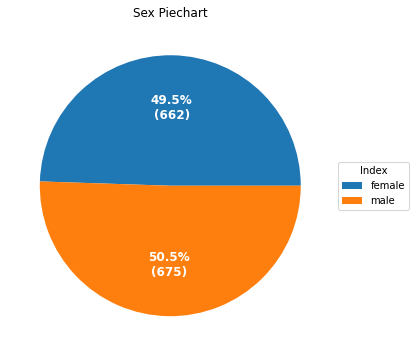

In [12]:
pie_chart('sex')

In [13]:
df['charges in INR'].groupby(df['sex']).mean()

sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64

Analysis :
 - Males and Females are equally contributed in Policy. that's why gender of the person dosen't matter for the company as a constraint for extending policies

2. What is the average amount of money the company spent over each policy cover

In [14]:
Average_money = round(df['charges in INR'].mean(),2)
print('The average amount of money the company spent over each policy cover is : ',Average_money,' INR')

The average amount of money the company spent over each policy cover is :  13270.42  INR


3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

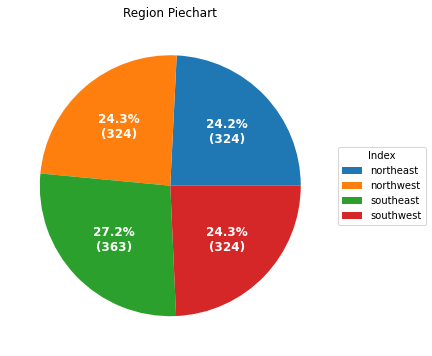

In [15]:
pie_chart('region')

In [16]:
df['charges in INR'].groupby(df['region']).mean()

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges in INR, dtype: float64

Analysis : 
- There is no significant Difference between the regions to contributing Policy And Charges. so we will not advice the company to offer separate policies based upon the geographic location of the person.

4. Does the no. of dependents make a difference in the amount claimed

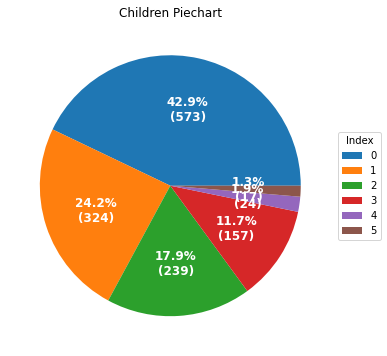

In [17]:
pie_chart('children')

In [18]:
round(df['charges in INR'].groupby(df['children']).mean(),2)

children
0    12365.98
1    12731.17
2    15073.56
3    15355.32
4    13850.66
5     8786.04
Name: charges in INR, dtype: float64

Analysis :
- Yes,no. of dependents make a difference in the amount claimed. we can see Person with no depepends claimed less amount than perso who has more than 1 or 2 dependents. person who has more than 4 dependents claimed less amount.

5. Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

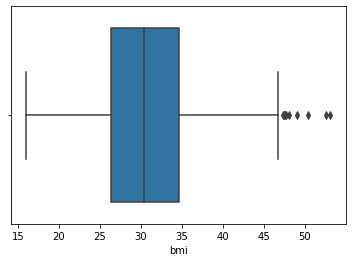

In [19]:
sns.boxplot(df['bmi'])

In [20]:
Q1 = df['bmi'].quantile(0.25)
Q2 = df['bmi'].quantile(0.50)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
LW = Q1 - (1.5 * IQR)
UW = Q3 + (1.5 * IQR)
df.loc[(df['bmi'] < LW), 'bmi'] = Q1 
df.loc[(df['bmi'] > UW), 'bmi'] = Q3 

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

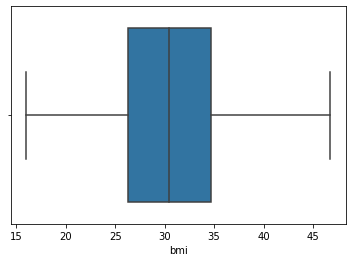

In [21]:
sns.boxplot(df['bmi'])

In [22]:
# The Perason Who is paying the highest charges
df[df['charges in INR'] == df['charges in INR'].max()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
1157,PLC161785,0,yes,southeast,54,female,34.69375,63770.42801


In [23]:
#The Person Who is the insured with the highest BMI
df[df['bmi'] == df['bmi'].max()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
358,PLC160840,5,no,southeast,52,female,46.75,12592.5345


In [24]:
#The Person Who is the insured with the Lowest BMI
df[df['bmi'] == df['bmi'].min()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
839,PLC158446,0,no,northeast,18,male,15.96,1694.7964


In [25]:
#Average Charges for Policy
round(df['charges in INR'].mean(),2),round(df['charges in INR'].median(),2) 

(13270.42, 9382.03)

Analysis : 
- Person with high BMI claimed high amount than Person who has low BMI.
- Yes,study of persons BMI get the company any idea for the insurance claim that it would extend    

6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

In [27]:
# Checking average premium charges for smokers significantly higher than non-smokers.
df['charges in INR'].groupby(df['smoker']).mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges in INR, dtype: float64

In [28]:
df.groupby(['smoker', 'sex']).agg('count')['age']

smoker  sex   
no      female    547
        male      517
yes     female    115
        male      159
Name: age, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='charges in INR'>

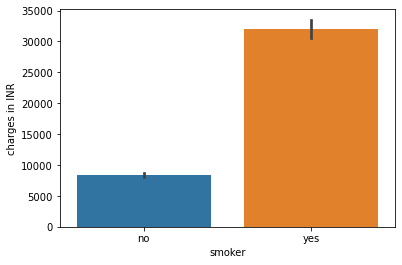

In [29]:
sns.barplot(x = 'smoker', y = 'charges in INR', data = df)

Analysis :
- Them amount claimed by smoker is higher than the non-smokers. so company need to more focus on smokers.
- yes,the company to understand whether the person covered is a smoker or a non-smoker.

7. Does age have any barrier on the insurance claimed?

In [30]:
df['age'].value_counts()

18    69
19    68
20    29
48    29
47    29
51    29
50    29
45    29
52    29
46    29
21    28
24    28
25    28
28    28
27    28
49    28
23    28
53    28
22    28
26    28
54    28
42    27
30    27
31    27
43    27
40    27
41    27
44    27
29    27
33    26
56    26
55    26
32    26
57    26
34    26
58    25
59    25
37    25
39    25
36    25
38    25
35    25
61    23
60    23
62    23
63    23
64    22
Name: age, dtype: int64

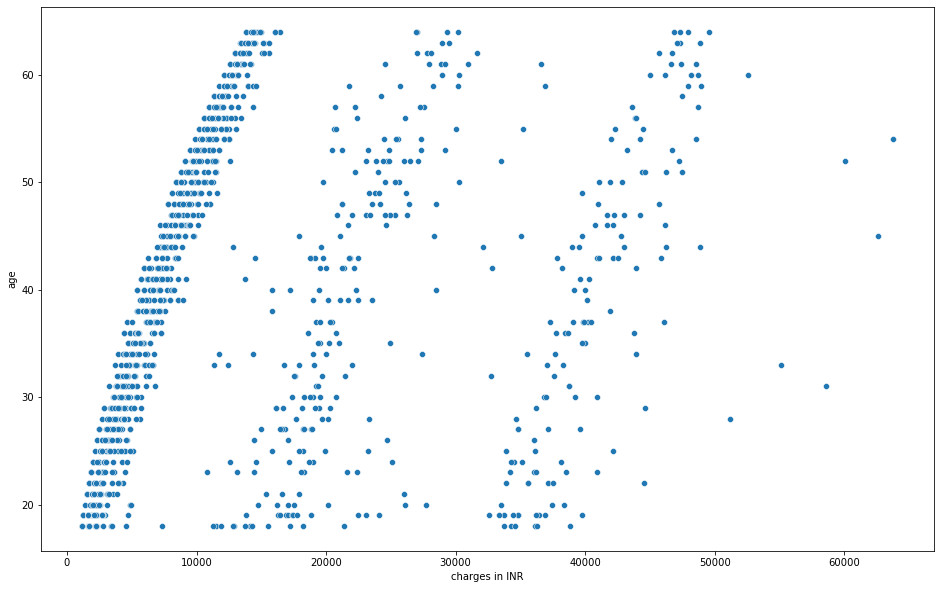

In [31]:
fig = plt.figure(figsize=(16, 10))
ax1 = sns.scatterplot( x = 'charges in INR', y=  'age', data = df)

Analysis :
- Person who has age 18 and 19 claimed more number of insurance than other age group people. but all other age groups equally Contributed in insurance claim. so there is no age barrier  on the insurance claimed.

8. Can the company extend certain discounts after checking the health status (BMI) in this case?

C:\Users\Mahesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


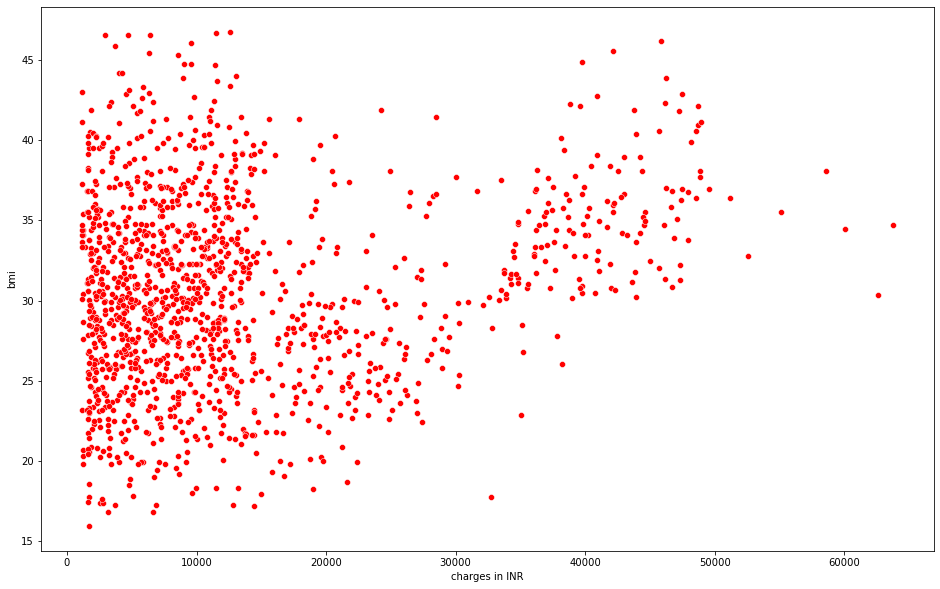

In [32]:
fig = plt.figure(figsize=(16, 10))
ax1 = sns.scatterplot(df['charges in INR'],df['bmi'],color = 'r')

In [33]:
# The Perason Who is paying the highest charges
df[df['charges in INR'] == df['charges in INR'].max()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
1157,PLC161785,0,yes,southeast,54,female,34.69375,63770.42801


In [51]:
#The Person Who is the insured with the Highest BMI
df[df['bmi'] == df['bmi'].max()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
358,PLC160840,5,no,southeast,52,female,46.75,12592.5345


In [35]:
#The Person Who is the insured with the Lowest BMI
df[df['bmi'] == df['bmi'].min()]

,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
839,PLC158446,0,no,northeast,18,male,15.96,1694.7964


In [50]:
count_bmi = 0
for x in df['bmi']:
    if x > 15 and x < 24:
        count_bmi = count_bmi + 1
    counts = count_bmi
print('Number of person who has bmi greater than 30 is :',counts, 'out of 1338 persons.')
    

Number of person who has bmi greater than 30 is : 188 out of 1338 persons.


Analysis :
- out of 1338 persons , 188 person who has low(18 to 24) BMI. Also the persons who has low BMI are claimed less  amount than person wh has high BMI.
- To attract persons who has low BMI. company need to extend certain discounts for low BMI persons.